## 상관관계, 상관계수

In [22]:
from IPython.display import display, Image
print("슝=3")

In [2]:
import pandas as pd

In [3]:
!pwd

/home/aiffel0049/aiffel/Exploration/5.regression


In [58]:
macbook_csv_path = '/home/aiffel0049/aiffel/Exploration/5.regression/data/macbook.csv'
macbook = pd.read_csv(macbook_csv_path)
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print("슝=3")

슝=3


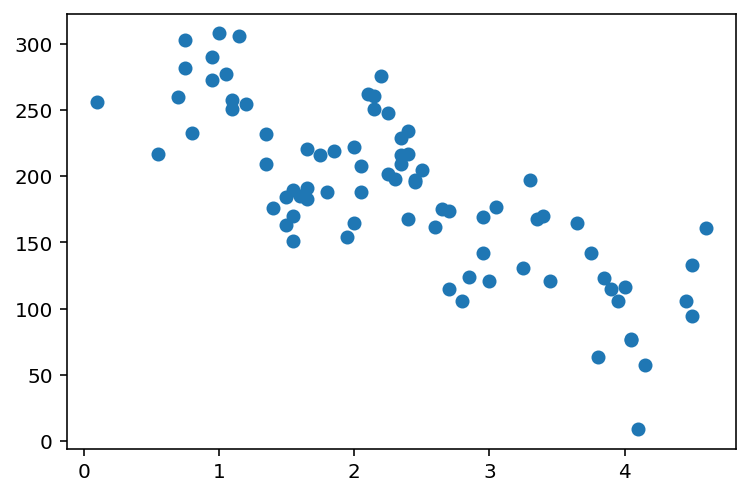

In [7]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

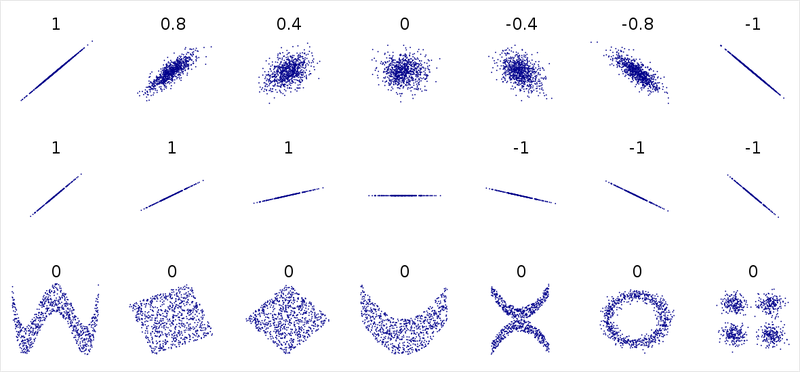

In [16]:
Image(filename="/home/aiffel0049/aiffel/images/E-7-2.max-800x600_ELGrbw8.png")


- 상관계수
    - 원에 가까울수록 0에 가까워짐
    - 맨 아래줄의 패턴은 양 or 음의 상관관계를 갖지 않으므로, 상관계수는 0

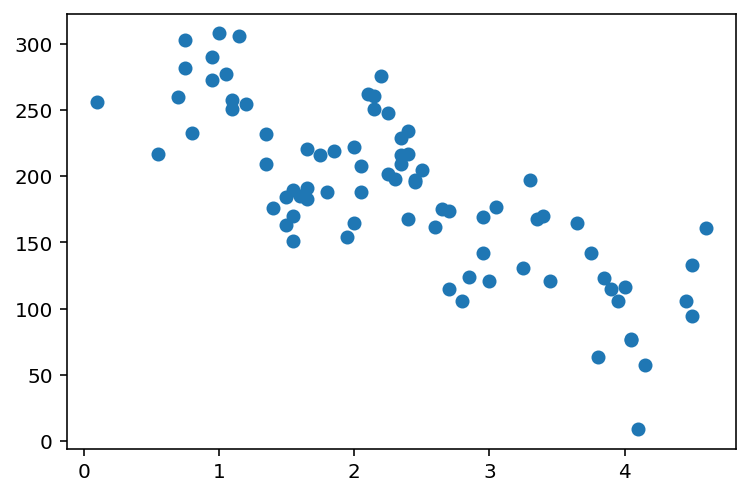

In [17]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [18]:
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

- corrcoef() : 상관계수 구하는 함수

## 모델 만들기

In [19]:
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

슝=3


In [20]:
def model(x, w, b):
    y = w * x + b
    return y
print("슝=3")

슝=3


In [21]:
model(x=5, w=2, b=1)

11

### 세 점을 지나는 일차함수

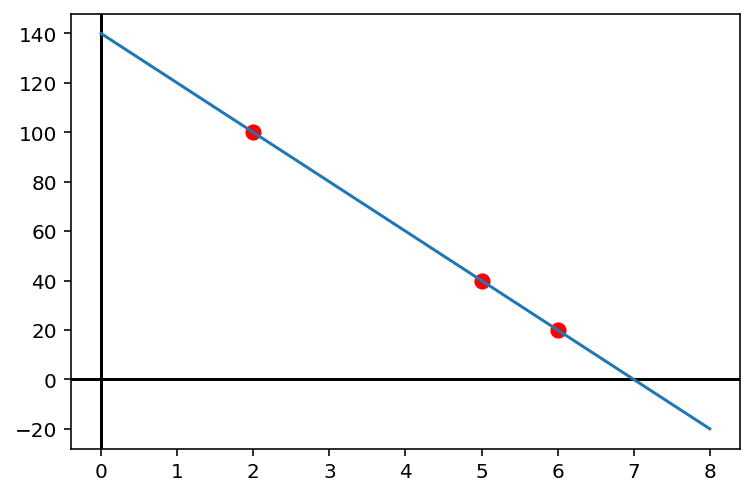

In [23]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

### 현실의 데이터

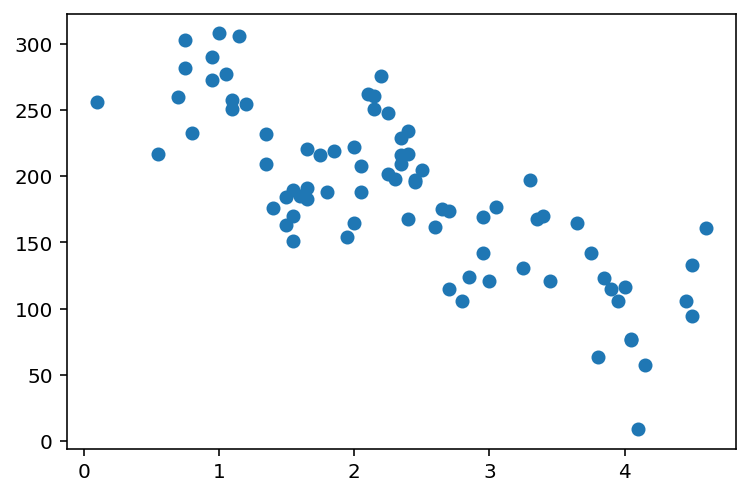

In [24]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

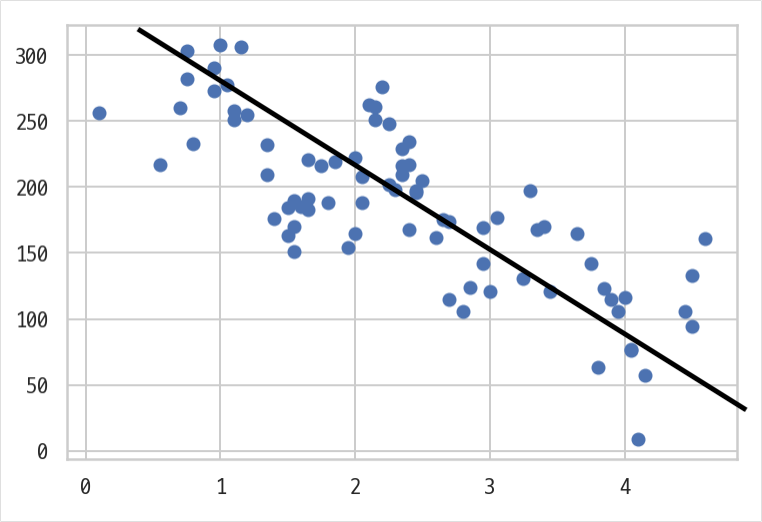

In [30]:
Image(filename="/home/aiffel0049/aiffel/images/E-7-1.max-800x600_zqSi1aS.png")

- 위와 같이 최소한의 오차를 갖는 일차함수 모델을 찾는것이 목적

## 손실함수

### 의미
- 아직 불완전한 현재의 모델이 출력하는 값과 실제 정답 간의 차이

### 초기화한 일차함수

- w, b 초기값 설정

In [31]:
w = 3.1
b = 2.3
print("슝=3")

슝=3


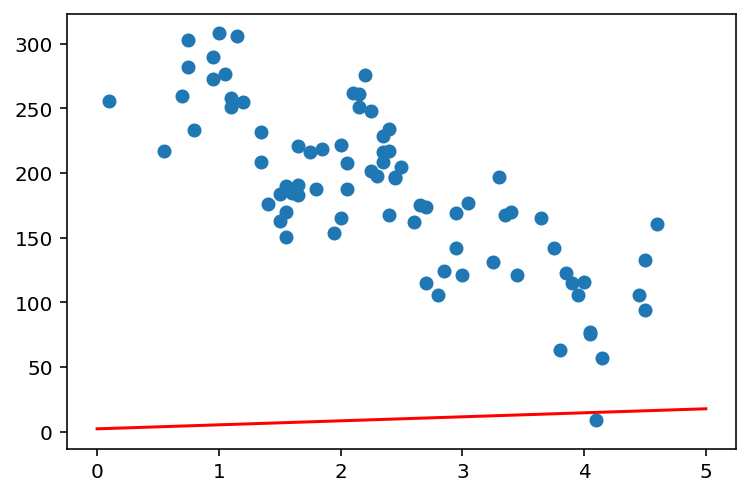

In [32]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

- 초기값으로 그린 일차함수 모델

In [33]:
x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [34]:
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

- 예측값

In [35]:
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [36]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


- 오차 : 정답과 예측값 간의 차이

### 오차함수

In [67]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse'
print("슝=3")

SyntaxError: EOL while scanning string literal (<ipython-input-67-ab617a355ba2>, line 4)

In [68]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[174.02354227 122.35684722 250.40039581  90.90755459  93.15393263
 171.77716422 156.0525179  191.99456663 189.74818858 209.96559099
 225.69023731 250.40039581 176.26992031 268.37142017 200.98007881
 259.38590799 115.61771309 167.28440813 200.98007881 241.41488363
 232.42937145 142.57424963 232.42937145 183.00905445 185.25543249
 288.58882258 138.08149354 187.50181054 261.63228604 245.90763972
 214.45834708 108.87857895  90.90755459 113.37133504 203.22645686
 183.00905445 180.7626764  198.73370077 158.29889595 111.124957
 171.77716422 196.48732272 144.82062768 185.25543249 165.03803009
 218.95110317 223.44385927 196.48732272 140.32787159 223.44385927
 257.13952995 160.54527399 185.25543249 230.1829934  218.95110317
 191.99456663 120.11046918 117.86409113  86.4147985  187.50181054
 111.124957   239.16850558 205.4728349  221.19748122 203.22645686
 212.21196904 124.60322527 129.09598136 187.50181054 194.24094468
 248.15401776 106.63220091 243.66126167 223.44385927 160.54527399
 225.6902373

In [69]:
rmse = RMSE(predictions, y)
rmse

38.303841049095496

- 오차함수 = 손실함수 = 비용함수

In [43]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print("슝=3")

슝=3


### 기울기와 경사하강법

In [46]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print("슝=3")

슝=3


In [47]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
print("슝=3")

슝=3


In [48]:
LEARNING_RATE = 1
print("슝=3")

슝=3


- Learning Rate 처럼 사람이 학습 전에 설정해야하는 파라미터 : 하이퍼 파라미터

In [49]:
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

슝=3


In [50]:
w = 3.1
b = 2.3
w, b

(3.1, 2.3)

In [52]:
losses = []
print("슝=3")

슝=3


### 학습

In [53]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


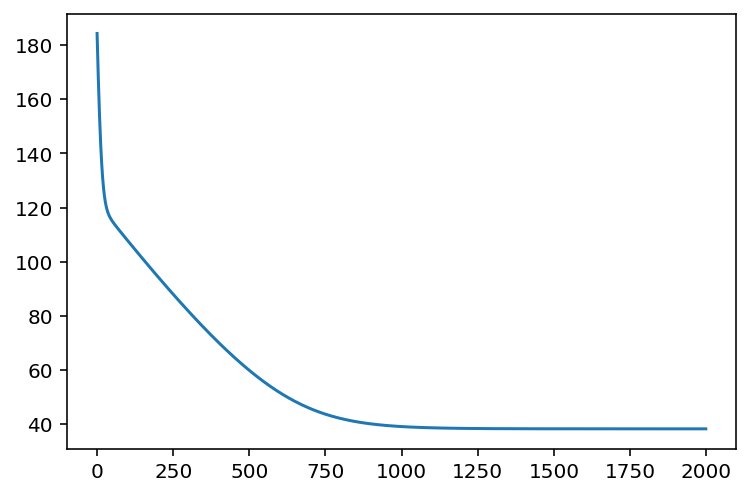

In [54]:
plt.plot(losses)
plt.show()

In [55]:
w, b

(-44.92756090768412, 293.0815786721102)

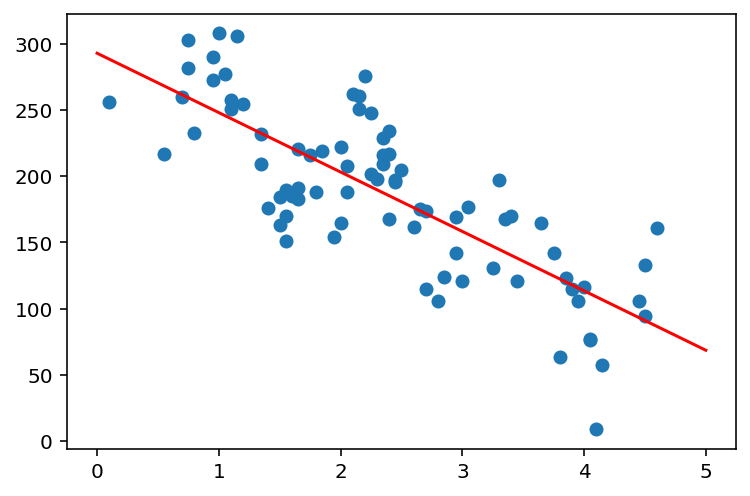

In [56]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [59]:
test = pd.read_csv(macbook_csv_path)
print(test.shape)
test.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [60]:
test_x = test['used_years'].values
test_y = test['price'].values

In [61]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,2.65,175,174.023542
1,3.80,63,122.356847
2,0.95,273,250.400396
3,4.50,133,90.907555
4,4.45,106,93.153933
...,...,...,...
75,1.50,184,225.690237
76,1.65,191,218.951103
77,1.10,251,243.661262
78,3.25,131,147.067006


In [62]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,2.65,175,174.023542,0.976458
1,3.80,63,122.356847,-59.356847
2,0.95,273,250.400396,22.599604
3,4.50,133,90.907555,42.092445
4,4.45,106,93.153933,12.846067
...,...,...,...,...
75,1.50,184,225.690237,-41.690237
76,1.65,191,218.951103,-27.951103
77,1.10,251,243.661262,7.338738
78,3.25,131,147.067006,-16.067006


In [63]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

38.303841049095496

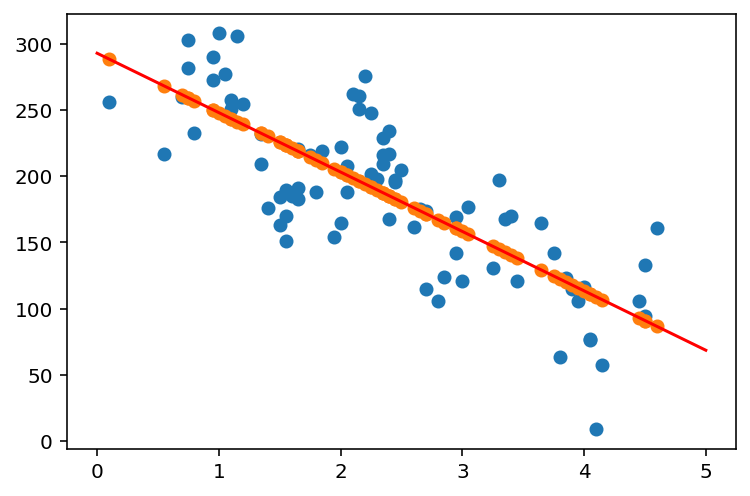

In [65]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()